# Introduction to polytopes in Sage

This tutorial aims to showcase some of the possibilities of Sage concerning polytopes.

## $V$-representation

First, let’s define a polyhedron object as the convex hull of a set of points and some rays.

In [1]:
P1 = Polyhedron(vertices = [[1, 0], [0, 1]], rays = [[1, 1]])


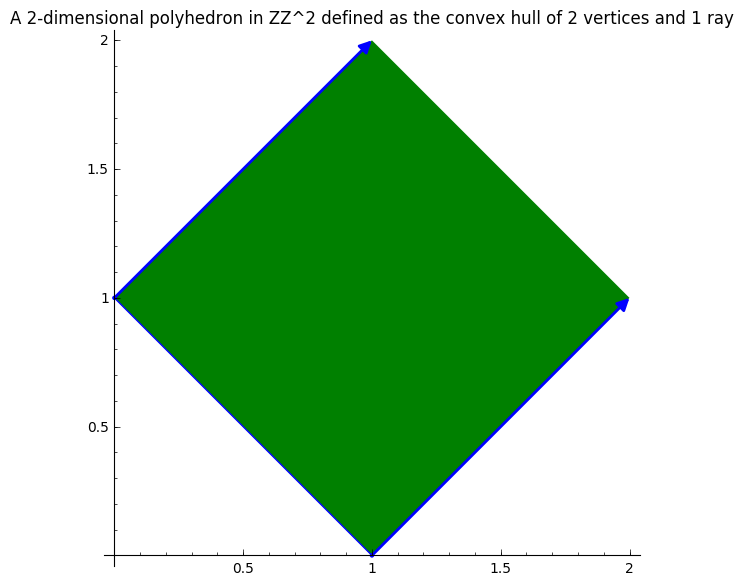

In [2]:
P1

The string representation already gives a lot of information:

* the dimension of the polyhedron (the smallest affine space containing it)
* the dimension of the space in which it is defined
* the base ring ($\mathbb{Z}^2$) over which the polyhedron lives (this specifies the parent class)
* the number of vertices
* the number of rays

Of course, you want to know what this object looks like:

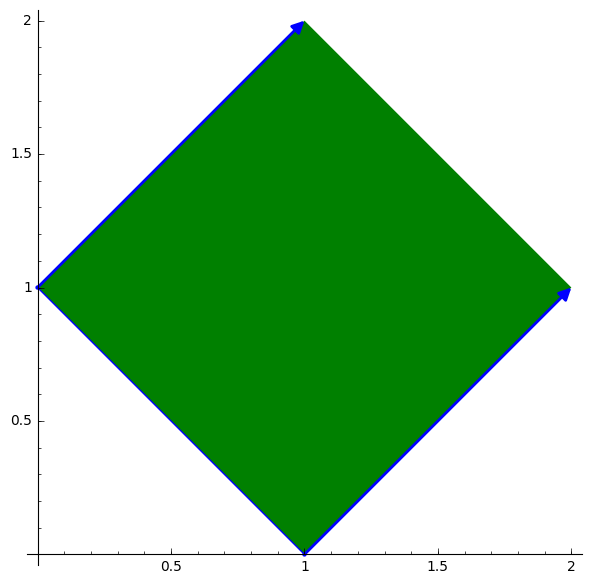

In [3]:
P1.plot()

We can also add a lineality space.

We can see all the methods available by pressing <tab> after the dot.

In [4]:
P1.

SyntaxError: invalid syntax (<ipython-input-4-e38a54d2cd64>, line 1)

In [5]:
P2 = Polyhedron(vertices = [[1/2, 0, 0], [0, 1/2, 0]],rays = [[1, 1, 0]],lines = [[0, 0, 1]])

In [6]:
P2

A 3-dimensional polyhedron in QQ^3 defined as the convex hull of 2 vertices, 1 ray, 1 line (use the .plot() method to plot)

In [7]:
P1.parent()

Polyhedra in ZZ^2

In [8]:
P2.parent()

Polyhedra in QQ^3

## $H$-representation

If a polyhedron object was constructed via a $V$-representation, Sage can provide the $H$-representation of the object.

In [9]:
for h in P1.Hrepresentation():
    print(h)

An inequality (1, 1) x - 1 >= 0
An inequality (1, -1) x + 1 >= 0
An inequality (-1, 1) x + 1 >= 0


Each line gives a row of the matrix $A$ and an entry of the vector $b$. The variable $x$ is a vector in the ambient space where $P1$ is defined. The $H$-representation may contain equations:

The construction of a polyhedron object via its $H$-representation, requires a precise format. Each inequality $(a_{i1},\ldots,a_{id})⋅x+bi\geq 0$ must be written as $[b_i,a_{i1}, \ldots, a_{id}]$.

It is worth using the parameter eqns to shorten the construction of the object. In the following example, the first four rows are the negative of the second group of four rows.

As we learned from lectures, examples are very important. Sage has implemented several examples: <http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html">


## Representation of objects

Many objects are related to the  $H$- and $V$-representations. Sage has classes implemented for them.

### $H$-representation

You can store the $H$-representation in a variable and use the inequalities and equalities as objects.

In [20]:
P3_QQ = Polyhedron(vertices = [[0.5, 0], [0, 0.5]], base_ring=QQ)

In [21]:
HRep = P3_QQ.Hrepresentation()

In [22]:
H1 = HRep[0]; H1

An equation (2, 2) x - 1 == 0

In [23]:
H2 = HRep[1]; H2

An inequality (0, -2) x + 1 >= 0

In [24]:
 H1.A()

(2, 2)

In [25]:
H1.b()

-1

In [26]:
H1.is_equation()

True

In [27]:
H1.is_inequality()

False

In [28]:
H1.contains(vector([0,0]))

False

In [29]:
H2.contains(vector([0,0]))

True

In [30]:
H1.is_incident(H2)

True

It is possible to obtain the different objects of the H-representation as follows.

In [31]:
P3_QQ.equations()

(An equation (2, 2) x - 1 == 0,)

In [32]:
P3_QQ.inequalities()

(An inequality (0, -2) x + 1 >= 0, An inequality (0, 1) x + 0 >= 0)

### $V$-representation

Similarly, you can access vertices, rays and lines of the polyhedron.

In [33]:
VRep = P2.Vrepresentation(); VRep

(A line in the direction (0, 0, 1),
 A vertex at (0, 1/2, 0),
 A vertex at (1/2, 0, 0),
 A ray in the direction (1, 1, 0))

In [34]:
L = VRep[0]; L

A line in the direction (0, 0, 1)

In [35]:
V = VRep[1]; V

A vertex at (0, 1/2, 0)

In [36]:
R = VRep[3]; R

A ray in the direction (1, 1, 0)

In [37]:
L.is_line()

True

In [38]:
L.is_incident(V)

True

In [39]:
R.is_incident(L)

False

In [40]:
L.vector()

(0, 0, 1)

In [41]:
V.vector()

(0, 1/2, 0)

It is possible to obtain the different objects of the V-representation as follows.

In [42]:
P2.vertices()

(A vertex at (0, 1/2, 0), A vertex at (1/2, 0, 0))

In [43]:
P2.rays()

(A ray in the direction (1, 1, 0),)

In [44]:
P2.lines()

(A line in the direction (0, 0, 1),)

In [45]:
 P2.vertices_matrix()

[  0 1/2]
[1/2   0]
[  0   0]

** Exercise A **

In this exercise, you will construct the cuboctahedron in several different ways and verify that you get the same combinatorial type.

1) The first options is to check if it is in the library: <http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html>. It is! So we can just use the provided construction.

In [1]:
 CO = polytopes.cuboctahedron()

Let's see if it looks like what we expect:

In [2]:
CO.plot()

Graphics3d Object

We can ask the $f$-vector of the cuboctahedron:

In [18]:
Img = CO.projection().tikz([-470,-1,790],36,opacity=0.1)

In [14]:
proj = CO.projection()

In [15]:
proj.tikz?

In [8]:
latex.add_to_preamble("\\usepackage{tikz}")

In [20]:
Img

\begin{tikzpicture}%
	[x={(0.858944cm, 0.505253cm)},
	y={(-0.505040cm, 0.809017cm)},
	z={(-0.084559cm, 0.300352cm)},
	scale=2.000000,
	back/.style={loosely dotted, thin},
	edge/.style={color=blue!95!black, thick},
	facet/.style={fill=blue!95!black,fill opacity=0.100000},
	vertex/.style={inner sep=1pt,circle,draw=green!25!black,fill=green!75!black,thick,anchor=base}]
%
%
%% Coordinate of the vertices:
%%
\coordinate (-1.00000, -1.00000, 0.00000) at (-1.00000, -1.00000, 0.00000);
\coordinate (-1.00000, 0.00000, -1.00000) at (-1.00000, 0.00000, -1.00000);
\coordinate (-1.00000, 0.00000, 1.00000) at (-1.00000, 0.00000, 1.00000);
\coordinate (-1.00000, 1.00000, 0.00000) at (-1.00000, 1.00000, 0.00000);
\coordinate (0.00000, -1.00000, -1.00000) at (0.00000, -1.00000, -1.00000);
\coordinate (0.00000, -1.00000, 1.00000) at (0.00000, -1.00000, 1.00000);
\coordinate (0.00000, 1.00000, -1.00000) at (0.00000, 1.00000, -1.00000);
\coordinate (0.00000, 1.00000, 1.00000) at (0.00000, 1.00000, 1.00000

In [48]:
CO.f_vector()

(1, 12, 24, 14, 1)

2) The second construction uses the fact that we can truncate the vertices by new hyperplanes that cross the edges exactly at the mid-point.



In [49]:
Cube = polytopes.cube()

In [53]:
EC = Cube.edge_truncation(1/2)

/Applications/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: edge_truncation is deprecated. Please use truncation instead.
See http://trac.sagemath.org/18128 for details.
  from ipykernel.kernelapp import IPKernelApp


Just to make a sanity check we can compute the f-vector:



In [54]:
EC.f_vector()

(1, 12, 24, 14, 1)


But as we know, two different polytopes can have the same f-vector, so we should check if they are combinatorially isomorphic:



In [55]:
EC.is_combinatorially_isomorphic(CO)

True

This is great!

Just to understand the truncation construction better, visualize the usual truncation:


In [56]:
TC = Cube.truncation()

In [57]:
TC.show()

Graphics3d Object

3) The third construction will use some nice trick that we can do in sage.

We can take the polar dual of the cube, the octahedron, and scale it by a factor 2:

In [58]:
OC = 2*Cube.polar()

Then, we can take the intersection with the cube again :

In [59]:
ECCO = Cube & OC

What is ECCO?

In [60]:
ECCO.is_combinatorially_isomorphic(EC)

True

That's it! You found 3 ways to construct the cuboctahedron.

* Question: do they all have the same vertices?
* Question: which polytope do we get if we dilate the octahedron by only 3/2 instead of 2?
* Can you find this polytope in the library and check if it is isomorphic?

** Exercise B **

Choose five examples discussed in lecture from the list:
<http://doc.sagemath.org/html/en/reference/discrete_geometry/sage/geometry/polyhedron/library.html">
And find their $V$-representation, $H$-representation, and $f$-vector

